# model_names = ["Linear Regression", "Ridge Regression", "XGBoost", "Random Forest", "AdaBoost", "Gradient Boosting", "Bagging", "Decision Tree", "SVR", "KNN"]

plt.figure(figsize=(15, 10))

for i, model in enumerate(model_li):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    Score.append(r2)

    plt.subplot(3, 3, i+1)
    plt.scatter(X_test['Distance_km'], y_test, color='blue', label="Actual")
    plt.scatter(X_test['Distance_km'], y_pred, color='red', label="Predicted", alpha=0.7)
    plt.plot(np.sort(X_test['Distance_km']), np.sort(y_pred), color='green', linewidth=2)
    plt.title(f"{model_names[i]} (R²={r2:.2f})")
    plt.xlabel("Distance (km)")
    plt.ylabel("Delivery Time (min)")
    plt.legend()

plt.tight_layout()
plt.show()

for name, score in zip(model_names, Score):
    print(f"{name}: R² Score = {score:.4f}")

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d guanlintao/smart-pressure-control-prediction

Dataset URL: https://www.kaggle.com/datasets/guanlintao/smart-pressure-control-prediction
License(s): apache-2.0
100%|█████████████████████████████████████████| 240k/240k [00:01<00:00, 195kB/s]
100%|█████████████████████████████████████████| 240k/240k [00:01<00:00, 195kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Smart Pressure Control Prediction/smart-pressure-control-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Smart Pressure Control Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test.csv')

In [5]:
# Concatenating train and test data

df = pd.concat([df_train, df_test], axis=0)

In [6]:
df.head()

,DEGC1PV,DEGC2PV,DEGC3PV,DEGC4PV,DEGC5PV,DEGC6PV,DEGC1SV,DEGC2SV,DEGC3SV,DEGC4SV,...,NM3/H.5SV,NM3/H.6SV,TEMP,FC1,FC2,FC3,FC4,FC5,FC6,mmH2O
0,1022.0,1053.6,1240.2,1217.0,1165.3,1185.6,1005.0,1070,1220,1200,...,1370,6548,541.2,17.1,14.5,18.0,34.5,4.3,53.6,501
1,1019.2,1009.0,1215.5,1190.7,1133.6,1156.2,1005.0,1070,1210,1200,...,2299,6548,505.2,13.7,15.8,20.3,35.2,13.2,48.2,618
2,725.9,710.3,802.1,796.5,853.8,775.3,1050.2,1070,1200,1180,...,1900,3778,419.1,10.0,9.3,9.8,15.0,8.2,30.4,500
3,980.1,1032.2,1215.5,1189.0,1136.4,1161.0,1005.0,1070,1220,1210,...,2164,6465,529.1,15.7,14.9,18.0,36.4,12.7,49.0,605
4,1042.2,1023.1,1237.0,1183.7,1153.2,1103.4,1005.0,1070,1210,1200,...,988,4624,549.8,8.8,7.0,15.0,20.0,3.0,40.4,501


In [7]:
df.shape

(4320, 32)

In [8]:
df.size

138240

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 0 to 863
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEGC1PV    4320 non-null   float64
 1   DEGC2PV    4320 non-null   float64
 2   DEGC3PV    4320 non-null   float64
 3   DEGC4PV    4320 non-null   float64
 4   DEGC5PV    4320 non-null   float64
 5   DEGC6PV    4320 non-null   float64
 6   DEGC1SV    4320 non-null   float64
 7   DEGC2SV    4320 non-null   int64  
 8   DEGC3SV    4320 non-null   int64  
 9   DEGC4SV    4320 non-null   int64  
 10  DEGC5SV    4320 non-null   int64  
 11  DEGC6SV    4320 non-null   int64  
 12  NM3/H.1PV  4320 non-null   int64  
 13  NM3/H.2PV  4320 non-null   int64  
 14  NM3/H.3PV  4320 non-null   int64  
 15  NM3/H.4PV  4320 non-null   int64  
 16  NM3/H.5PV  4320 non-null   int64  
 17  NM3/H.6PV  4320 non-null   int64  
 18  NM3/H.1SV  4320 non-null   int64  
 19  NM3/H.2SV  4320 non-null   int64  
 20  NM3/H.3SV  432

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DEGC1PV,4320.0,947.868009,130.257061,474.1,886.775,999.2,1028.125,1156.0
DEGC2PV,4320.0,961.327917,148.083624,455.9,899.450,1029.3,1056.525,1164.9
DEGC3PV,4320.0,1124.809028,172.269262,551.6,1055.125,1216.2,1227.300,1314.6
DEGC4PV,4320.0,1100.827731,167.107663,493.0,1037.225,1189.3,1203.525,1260.4
DEGC5PV,4320.0,1075.118264,152.961636,525.7,1040.300,1144.7,1161.300,1264.7
DEGC6PV,4320.0,1056.913009,171.417240,496.1,993.975,1142.6,1163.600,1287.4
DEGC1SV,4320.0,1010.022222,14.206634,1005.0,1005.000,1005.0,1005.000,1050.2
DEGC2SV,4320.0,1070.000000,0.000000,1070.0,1070.000,1070.0,1070.000,1070.0
DEGC3SV,4320.0,1214.793981,9.645447,1180.0,1210.000,1215.0,1220.000,1265.0
DEGC4SV,4320.0,1201.196759,10.010561,1180.0,1200.000,1200.0,1210.000,1240.0


In [11]:
df.isnull().sum()

DEGC1PV      0
DEGC2PV      0
DEGC3PV      0
DEGC4PV      0
DEGC5PV      0
DEGC6PV      0
DEGC1SV      0
DEGC2SV      0
DEGC3SV      0
DEGC4SV      0
DEGC5SV      0
DEGC6SV      0
NM3/H.1PV    0
NM3/H.2PV    0
NM3/H.3PV    0
NM3/H.4PV    0
NM3/H.5PV    0
NM3/H.6PV    0
NM3/H.1SV    0
NM3/H.2SV    0
NM3/H.3SV    0
NM3/H.4SV    0
NM3/H.5SV    0
NM3/H.6SV    0
TEMP         0
FC1          0
FC2          0
FC3          0
FC4          0
FC5          0
FC6          0
mmH2O        0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(480)

In [13]:
df.nunique()

DEGC1PV      2129
DEGC2PV      1997
DEGC3PV      1783
DEGC4PV      1787
DEGC5PV      1847
DEGC6PV      2017
DEGC1SV         2
DEGC2SV         1
DEGC3SV        13
DEGC4SV         9
DEGC5SV        13
DEGC6SV         4
NM3/H.1PV    1474
NM3/H.2PV    1563
NM3/H.3PV    2232
NM3/H.4PV    2985
NM3/H.5PV    1524
NM3/H.6PV    1640
NM3/H.1SV     767
NM3/H.2SV     820
NM3/H.3SV    1665
NM3/H.4SV    1881
NM3/H.5SV    1264
NM3/H.6SV     691
TEMP         1401
FC1           165
FC2           160
FC3           255
FC4           307
FC5           366
FC6           360
mmH2O         165
dtype: int64

In [14]:
df['mmH2O'].value_counts()

mmH2O
600    420
500    354
601    306
599    294
501    231
      ... 
253      1
220      1
250      1
395      1
449      1
Name: count, Length: 165, dtype: int64

## Data Visualization

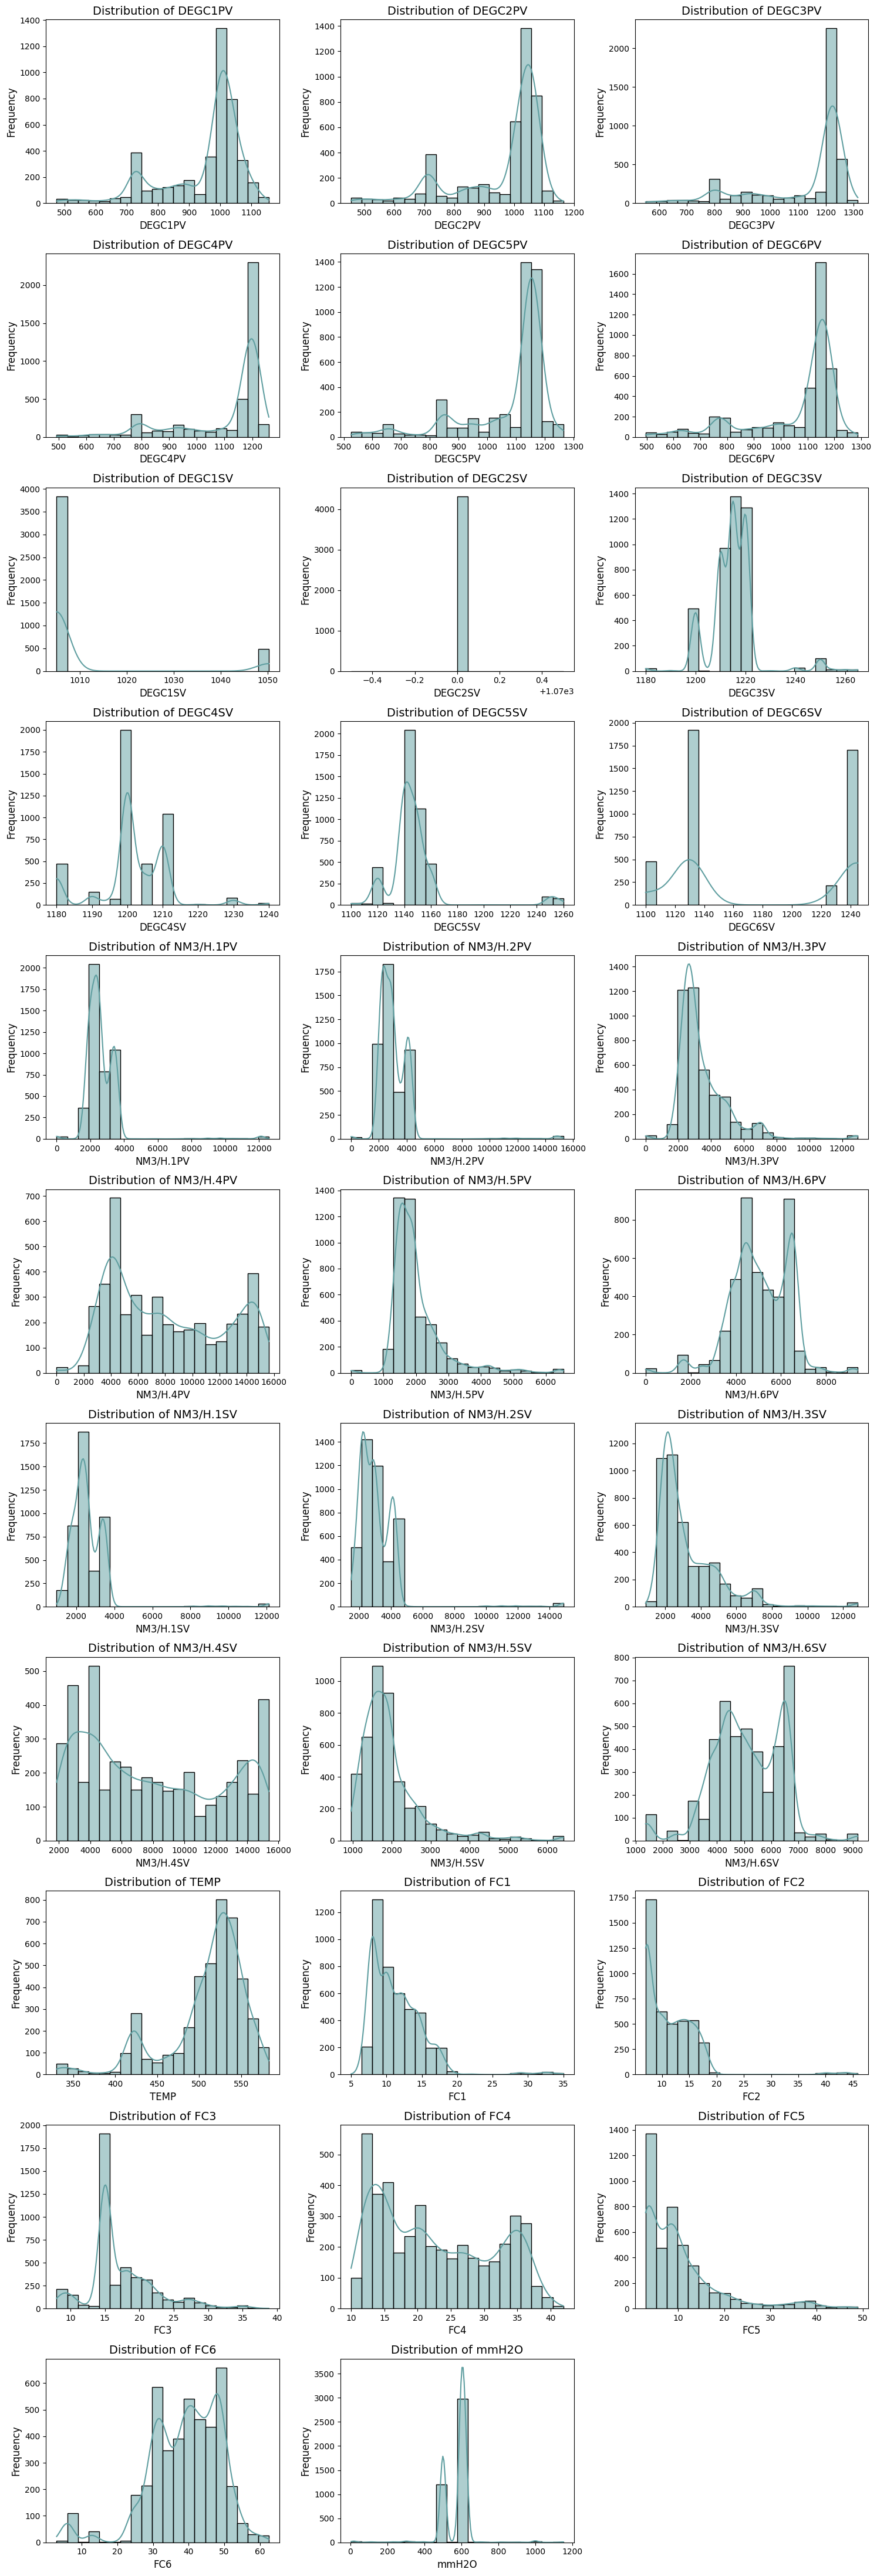

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

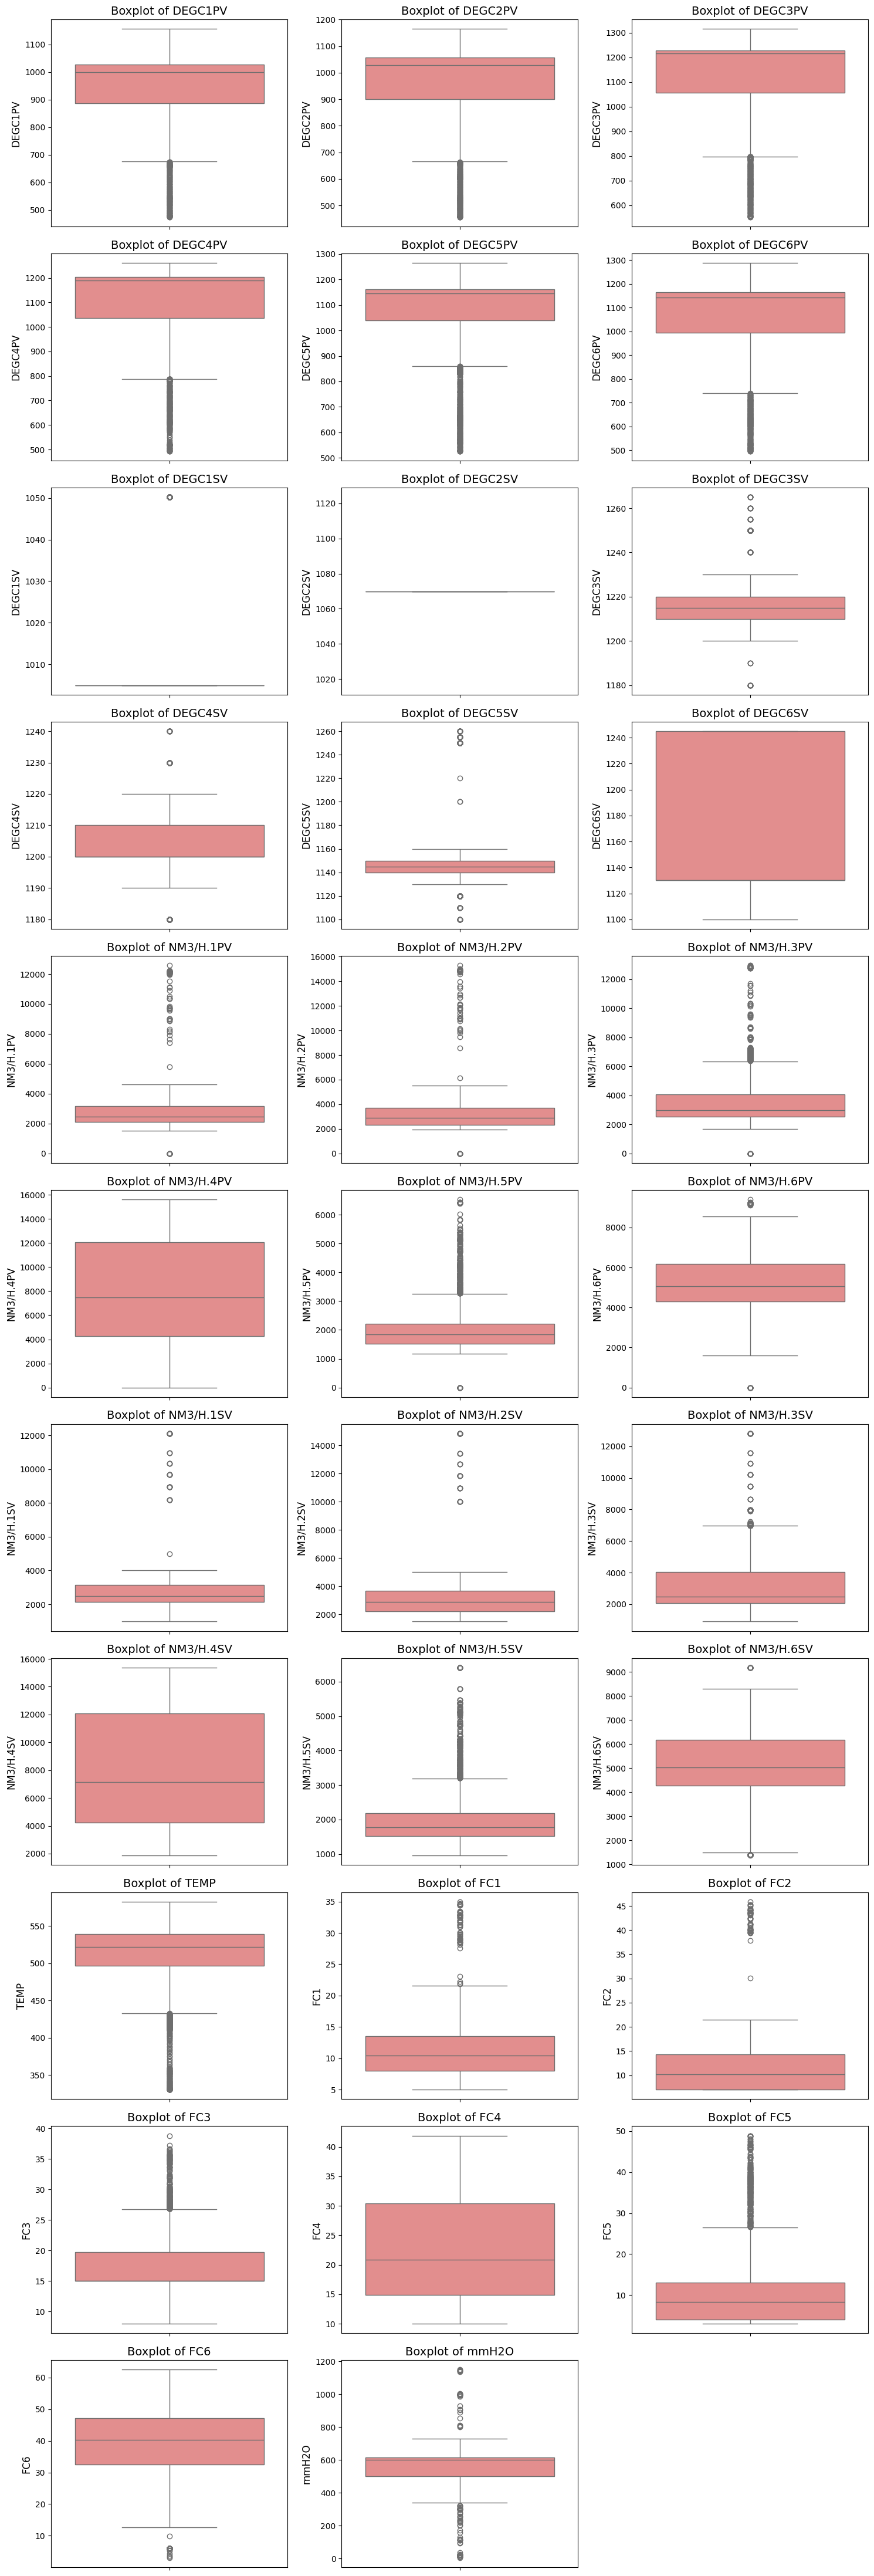

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

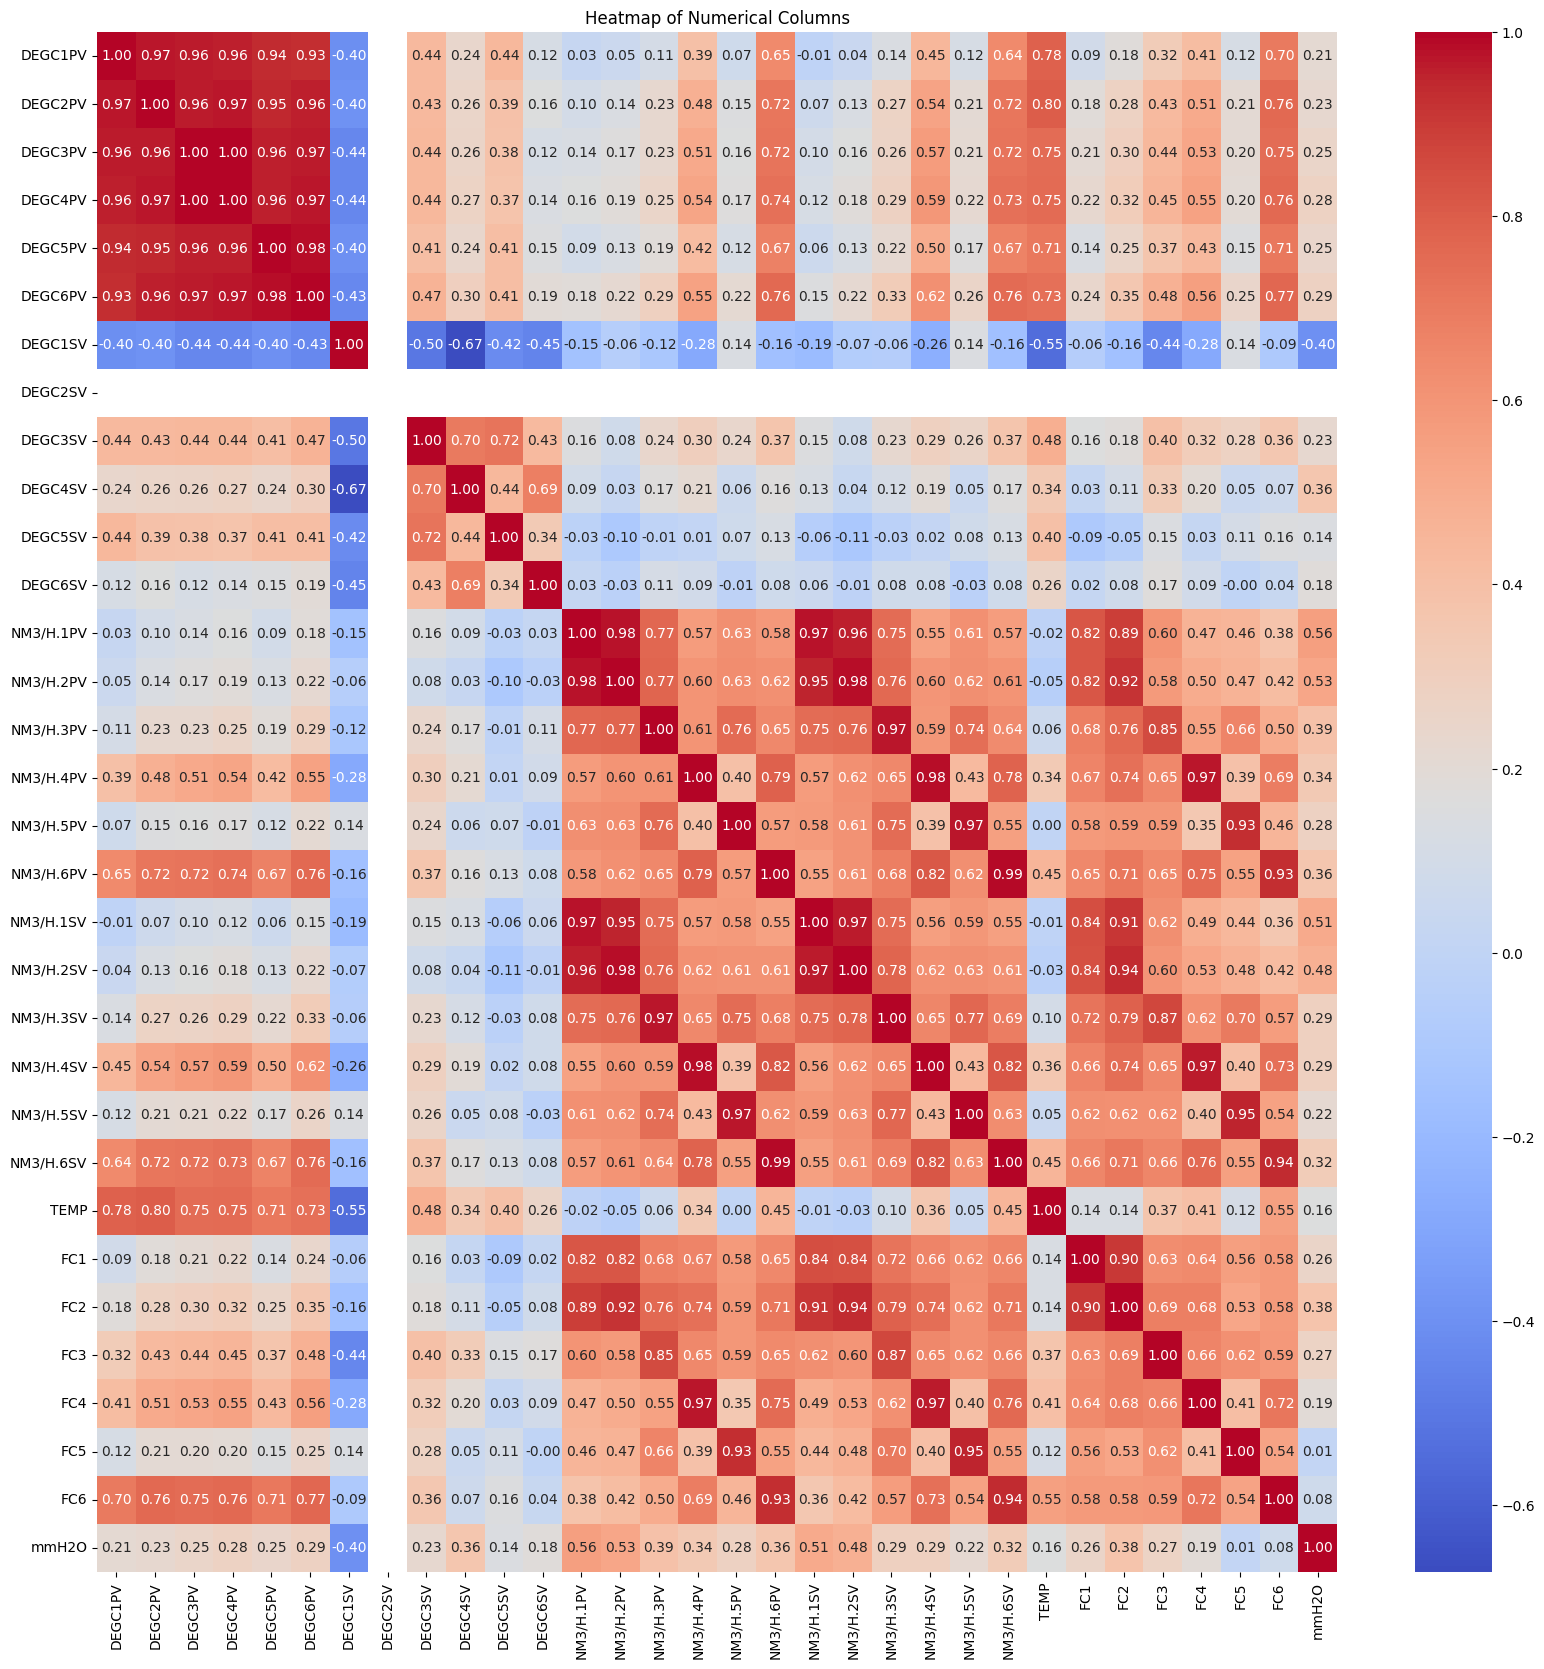

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 20))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [19]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

In [20]:
# Dropping columns with high correlation

correlation_matrix = df.corr()
threshold = 0.9

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df= df.drop(columns=correlated_features)
print(f"Columns removed due to high correlation: {correlated_features}")

Columns removed due to high correlation: {'FC4', 'DEGC2PV', 'NM3/H.5SV', 'NM3/H.6SV', 'DEGC5PV', 'DEGC6PV', 'NM3/H.1SV', 'NM3/H.3SV', 'DEGC3PV', 'NM3/H.4SV', 'FC2', 'FC5', 'DEGC4PV', 'FC6', 'NM3/H.2PV', 'NM3/H.2SV'}


In [21]:
X = df.drop(columns=['mmH2O'])
y = df['mmH2O']

In [22]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [26]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [27]:
model_li = [Linear_reg, Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.6325532842582873,
 0.6325499847098458,
 0.9889621138572693,
 0.9842292419513383,
 0.6999091800487253,
 0.9662645757748843,
 0.9871660887485235,
 0.9698451440093409,
 -0.10881700105917336,
 0.9314234441758548]

## Model Evaluation

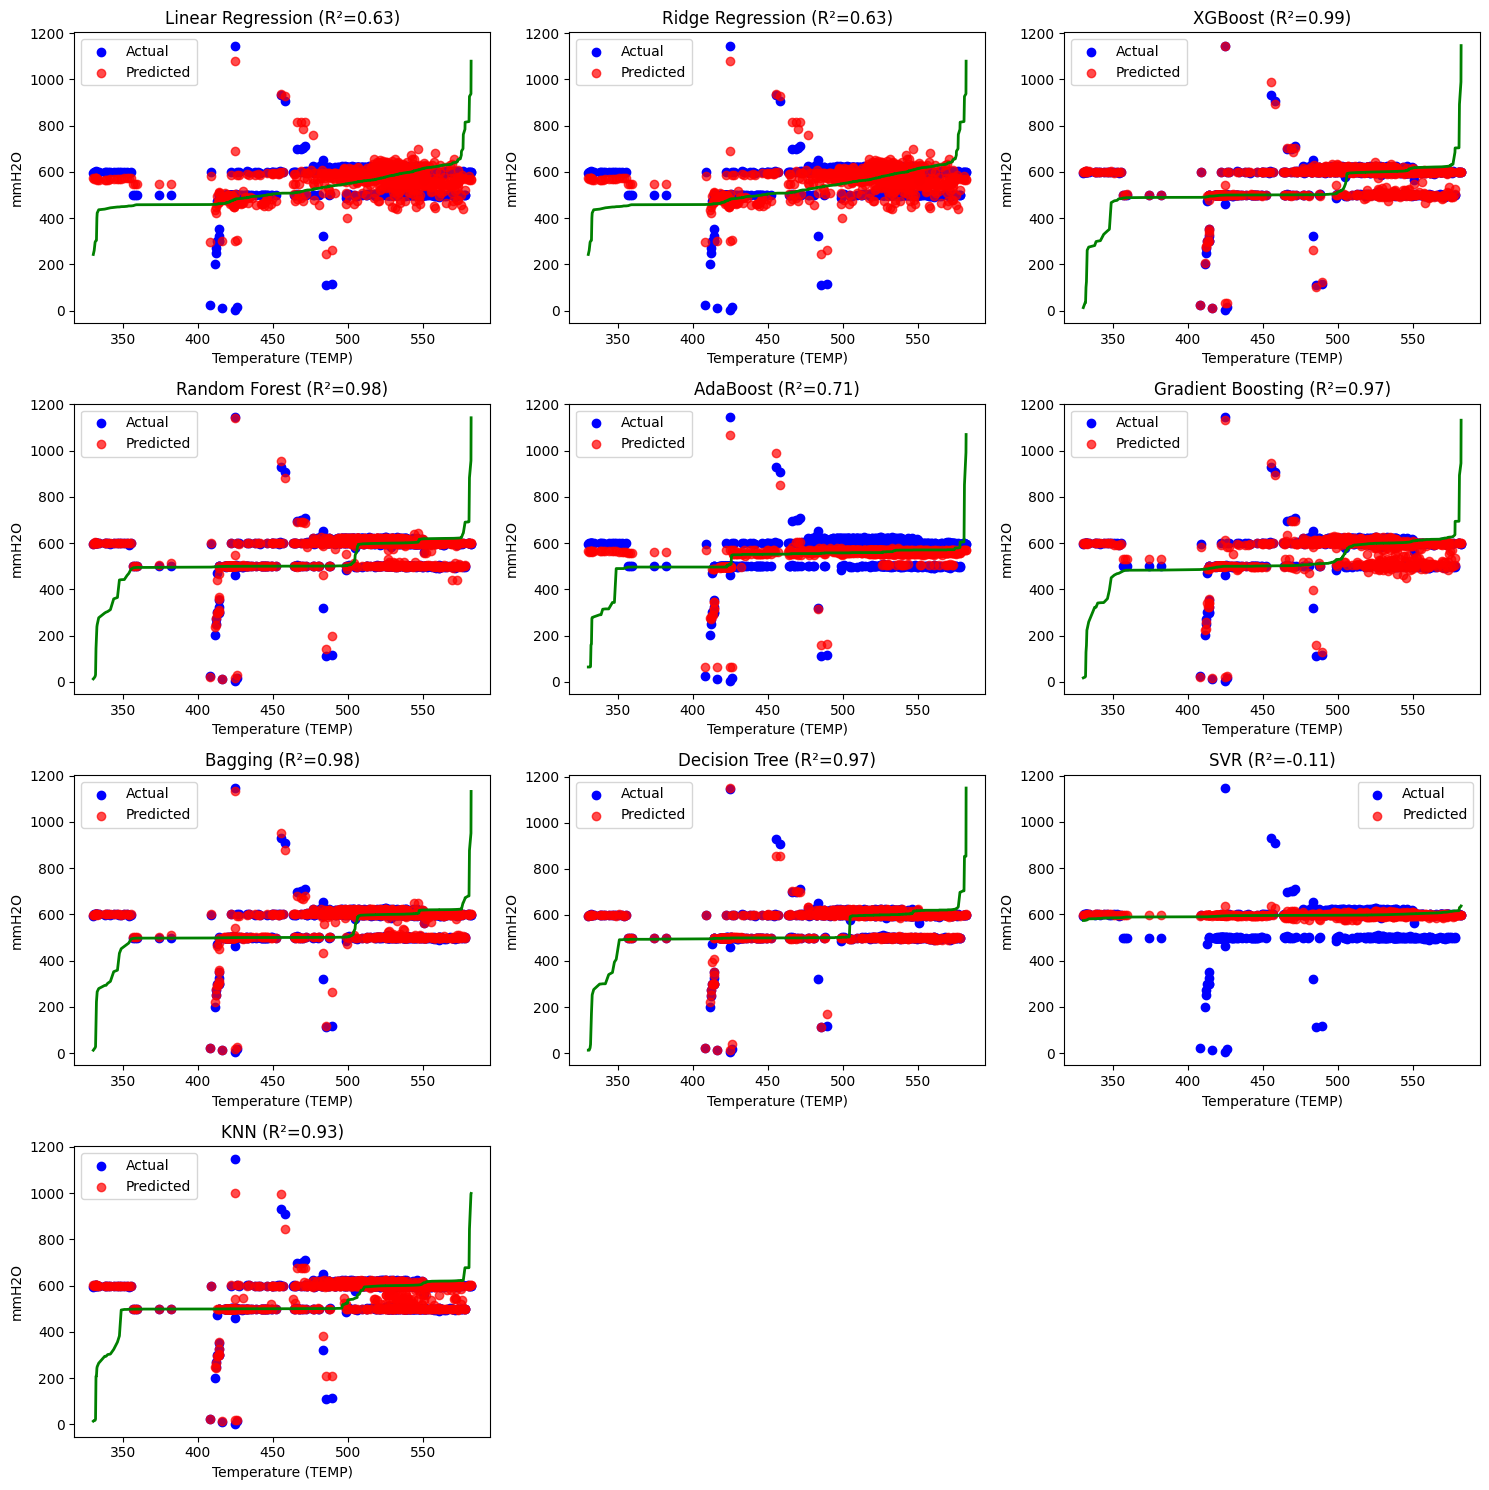

Linear Regression: R² Score = 0.6326
Ridge Regression: R² Score = 0.6325
XGBoost: R² Score = 0.9890
Random Forest: R² Score = 0.9842
AdaBoost: R² Score = 0.6999
Gradient Boosting: R² Score = 0.9663
Bagging: R² Score = 0.9872
Decision Tree: R² Score = 0.9698
SVR: R² Score = -0.1088
KNN: R² Score = 0.9314


In [30]:
model_names = ["Linear Regression", "Ridge Regression", "XGBoost", "Random Forest", "AdaBoost", "Gradient Boosting", "Bagging", "Decision Tree", "SVR", "KNN"]

plt.figure(figsize=(15, 15))

# Adjusting the grid to 4x3 to fit all 10 models
rows, cols = 4, 3

for i, model in enumerate(model_li):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    Score.append(r2)

    plt.subplot(rows, cols, i+1)
    plt.scatter(X_test['TEMP'], y_test, color='blue', label="Actual")
    plt.scatter(X_test['TEMP'], y_pred, color='red', label="Predicted", alpha=0.7)
    plt.plot(np.sort(X_test['TEMP']), np.sort(y_pred), color='green', linewidth=2)
    plt.title(f"{model_names[i]} (R²={r2:.2f})")
    plt.xlabel("Temperature (TEMP)")
    plt.ylabel("mmH2O")
    plt.legend()

plt.tight_layout()
plt.show()

for name, score in zip(model_names, Score):
    print(f"{name}: R² Score = {score:.4f}")